In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

a = pd.read_csv('palpenguins.csv')
a

x = a.drop('species', axis = 1)

dummies = pd.get_dummies(x)
dummies = dummies.astype(int)

dummies = pd.get_dummies(x, drop_first = True)
x = dummies.astype(int)
y = a['species']

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)


In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [7]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [8]:
y_pred = rfc.predict(x_test)
y_pred

array(['Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie', 'Gentoo',
       'Adelie', 'Gentoo', 'Adelie', 'Chinstrap', 'Adelie', 'Adelie',
       'Gentoo', 'Adelie', 'Adelie', 'Chinstrap', 'Adelie', 'Chinstrap',
       'Adelie', 'Adelie', 'Gentoo', 'Chinstrap', 'Adelie', 'Chinstrap',
       'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo', 'Gentoo', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo',
       'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Gentoo',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie',
       'Adelie', 'Chinstrap', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo',
       'Chinstrap', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie',
       'Chinstrap', 'Chinstrap', 'Adelie', 'Chinstrap', 'Gentoo',
       'Gentoo', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo',
       'Chinstrap', 'Adelie', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo',
       'Gentoo', 'Chinstrap

In [9]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Adelie       0.82      0.80      0.81       304
   Chinstrap       0.75      0.70      0.72       125
      Gentoo       0.88      0.95      0.91       257

    accuracy                           0.84       686
   macro avg       0.82      0.81      0.82       686
weighted avg       0.83      0.84      0.83       686



In [11]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[243,  29,  32],
       [ 38,  87,   0],
       [ 14,   0, 243]], dtype=int64)

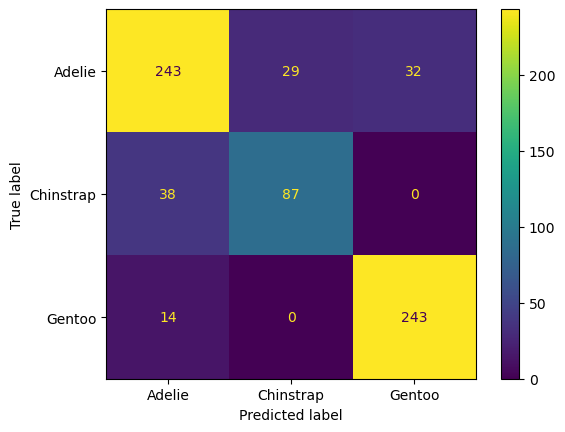

In [15]:
disp = ConfusionMatrixDisplay(cm, display_labels = rfc.classes_)
disp.plot()

**rfc.feature_importances_:**
- rfc.feature_importances_ is an array generated by the Random Forest Classifier (rfc), showing the importance of each feature in predicting the target variable.
- These values indicate how much each feature contributed to the model's decision-making process. A higher value means the feature is more important.

In [16]:
rfc.feature_importances_

array([0.11998041, 0.09876985, 0.11608363, 0.17967341, 0.04697537,
       0.20023574, 0.12384513, 0.02842445, 0.00906975, 0.00801311,
       0.0055604 , 0.00611504, 0.02530345, 0.01748225, 0.01446802])

In [18]:
x.columns

Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g',
       'year', 'island_Dream', 'island_Torgensen', 'sex_male', 'diet_krill',
       'diet_parental', 'diet_squid', 'life_stage_chick',
       'life_stage_juvenile', 'health_metrics_overweight',
       'health_metrics_underweight'],
      dtype='object')

In [19]:
feat_imp = pd.DataFrame({'feature': x.columns, 'importance': rfc.feature_importances_})

In [20]:
feat_imp

,feature,importance
0,bill_length_mm,0.119980
1,bill_depth_mm,0.098770
2,flipper_length_mm,0.116084
3,body_mass_g,0.179673
4,year,0.046975
5,island_Dream,0.200236
6,island_Torgensen,0.123845
7,sex_male,0.028424
8,diet_krill,0.009070
9,diet_parental,0.008013
